<a href="https://colab.research.google.com/github/prashantmalan/TradingStrategyMachineLearning/blob/main/FAANG_Stock_Trading_Strategy_with_ML_and_Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Overview

The document outlines a sophisticated stock trading strategy specifically targeting FAANG stocks, which include Facebook (now Meta), Apple, Amazon, Netflix, and Google (now Alphabet). This strategy leverages machine learning and technical indicators to manage a portfolio effectively.

#### Key Components

1. **Project Setup and Dependencies**: The project employs essential libraries such as `yfinance` for fetching historical market data, `pandas` and `numpy` for data manipulation, and `scikit-learn` for implementing machine learning models.

2. **Portfolio Management**: The `PortfolioManager` class is designed to manage a stock portfolio by calculating cash allocation based on market capitalization. It initializes with a set amount of cash and a list of FAANG stock tickers, and it fetches market capitalization data to allocate cash proportionally.

3. **Machine Learning Model Evaluation**: The `MLModelComparer` class evaluates the performance of several machine learning models on financial data. It prepares features from market data using technical indicators like Simple Moving Averages (SMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD). The class aims to predict whether the closing price of an asset will increase or decrease the next day.

4. **Visualization**: The `Visualizer` class provides visual representations of portfolio allocations and model performance. It includes methods for plotting market cap allocation, model comparison metrics, stock predictions, and portfolio summaries.

#### Machine Learning Focus

- **Model Selection**: The `MLModelComparer` class evaluates four different machine learning models: `RandomForestClassifier`, `GradientBoostingClassifier`, `SVC`, and `MLPClassifier`. These models are trained and tested on features derived from technical indicators to predict stock price movements.

- **Performance Metrics**: The evaluation process involves calculating several metrics, including accuracy, precision, recall, F1 score, and cross-validation score, to assess the models' performance. The F1 score, in particular, provides a balanced measure of precision and recall, guiding the selection of the best-performing model for financial forecasting.

- **Feature Engineering**: The class focuses on generating a set of technical indicators that serve as input features for the models. These indicators aim to capture different aspects of market trends and volatility, such as SMAs, RSI, MACD, volatility, and volume averages.

#### Execution Flow

- **Initialization**: The main function initializes the `PortfolioManager`, `MLModelComparer`, and `Visualizer` classes to manage portfolio allocation, evaluate models, and visualize results.

- **Portfolio Allocation**: The `get_market_cap_allocation` method calculates the cash allocation for each stock based on its market capitalization, and the results are visualized using a pie chart.

- **Data Processing and Model Training**: Historical stock data is retrieved, and features are prepared for machine learning models. The models are trained and evaluated, with results stored for each stock.

- **Model Selection and Prediction**: The best-performing model is selected based on the F1 score, and predictions are made for each stock. The results are visualized to show model performance and stock predictions.

#### Portfolio Allocation Example

The portfolio allocation based on market capitalization is as follows:

- **AAPL**: 33.4% allocation, with a cash allocation of $33,355.86.
- **META**: 17.1% allocation, with a cash allocation of $17,120.71.
- **AMZN**: 22.9% allocation, with a cash allocation of $22,875.77.
- **NFLX**: 5.6% allocation, with a cash allocation of $5,616.75.
- **GOOGL**: 21.0% allocation, with a cash allocation of $21,030.91.

The document concludes with a comprehensive overview of portfolio allocations, model comparisons, and individual stock predictions, providing a robust framework for informed investment decisions.

# Project Setup and Dependencies

This section details the essential libraries required for our project and their purposes.

## Key Libraries

*   **yfinance (yf):** Used to fetch historical market data from Yahoo Finance. This provides the financial data that will be the basis of our analysis and modeling.

*   **pandas (pd) and numpy (np):** These powerful libraries are the workhorses for data manipulation and numerical operations. Pandas provides data structures like DataFrames, which are essential for organizing and analyzing tabular data. NumPy provides efficient numerical arrays and operations for mathematical computations.

*   **datetime and timedelta:** These libraries are used for handling date and time operations, crucial for working with time-series data common in finance.  They allow us to filter, aggregate, and analyze data based on specific time intervals.

*   **scikit-learn (sklearn):** This is a comprehensive machine learning library that provides various models for prediction and analysis. It also includes tools for data preprocessing, model evaluation (e.g., cross-validation), and feature engineering.

*   **matplotlib.pyplot (plt):** Matplotlib is a widely used plotting library for creating static, interactive, and animated visualizations.  It allows us to visualize our data and the results of our models in a clear and informative way.

*   **curl_cffi:**  This library is used for making HTTP requests. It provides a way to interact with web services and APIs, potentially allowing us to fetch additional data or integrate with external platforms.

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from curl_cffi import requests
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Javascript
display(Javascript('''
google.colab.output.setIframeHeight(0, true, {maxHeight: 15000})
'''))


<IPython.core.display.Javascript object>


## PortfolioManager Class Overview

The `PortfolioManager` class provides a framework for managing a stock portfolio.  Its core functionality revolves around calculating cash allocation for each stock based on its market capitalization.

* **`__init__` Method**: Initializes the class with an initial cash amount and a list of stock tickers (META, AAPL, AMZN, NFLX, GOOGL).  This sets the starting point for portfolio management.

* **`get_market_cap_allocation` Method**:  This method performs the following actions:

    1. **Fetches Market Capitalization**: Retrieves current market capitalization data for each specified stock using `yfinance`.
    2. **Calculates Total Market Cap**:  Sums the market capitalization of all stocks in the portfolio.
    3. **Determines Percentage Allocation**: Computes the percentage of the total market cap represented by each stock.
    4. **Allocates Cash Proportionally**: Distributes the available cash across stocks according to their respective market cap percentages.  This creates a market-cap-weighted portfolio.


In [62]:
class PortfolioManager:
    def __init__(self, cash=100000):
        self.cash = cash
        self.tickers = {
            'META': 'Meta Platforms',
            'AAPL': 'Apple',
            'AMZN': 'Amazon',
            'NFLX': 'Netflix',
            'GOOGL': 'Alphabet'
        }
        self.session = requests.Session(impersonate="chrome")

    def get_market_cap_allocation(self):
        """Calculate allocation based on market capitalization"""
        market_caps = {}
        total_market_cap = 0

        for ticker in self.tickers:
            try:
                stock = yf.Ticker(ticker, session=self.session)
                market_cap = stock.info.get('marketCap', 0)
                market_caps[ticker] = market_cap
                total_market_cap += market_cap
            except Exception as e:
                print(f"Error fetching market cap for {ticker}: {e}")
                return None

        # Calculate allocations
        allocations = {
            ticker: {
                'market_cap': cap,
                'percentage': (cap / total_market_cap) * 100,
                'cash_allocation': self.cash * (cap / total_market_cap)
            }
            for ticker, cap in market_caps.items()
        }

        return allocations

# MLModelComparer Class Explanation

## Overview
The `MLModelComparer` class is designed to evaluate the performance of several machine learning models on financial data.  It prepares features from market data, trains the specified models, and then compares their performance using various metrics. This allows for a robust comparison of different model types and selection of the best-performing one for a given dataset.


## Features and Target Variable Creation
The class focuses on generating a set of technical indicators that serve as input features for the models. These indicators aim to capture different aspects of market trends and volatility.

* **Technical Indicators:** The features include:
    * Simple Moving Averages (SMA):  Provides a smoothed average of price over a specific period.
    * Relative Strength Index (RSI): Measures the speed and magnitude of price changes to evaluate overbought or oversold conditions.
    * Moving Average Convergence Divergence (MACD): Identifies momentum changes in price trends.
    * Volatility:  Measures price fluctuations, which can indicate risk.
    * Volume Averages: Captures the average trading volume over a period.

* **Target Variable:** The model aims to predict whether the closing price of an asset will increase or decrease on the next day.  A binary classification target is generated, with '1' indicating an increase and '0' indicating a decrease or no change.


## Model Evaluation
The `MLModelComparer` class evaluates four different machine learning models:

* **RandomForestClassifier:** An ensemble method that combines multiple decision trees for robust predictions.
* **GradientBoostingClassifier:** Another ensemble method that sequentially builds trees to improve predictions.
* **SVC (Support Vector Classifier):** Uses hyperplanes to separate data into different classes.
* **MLPClassifier (Multi-layer Perceptron):** A simple feedforward neural network.

The evaluation process involves the following steps:

1. **Data Splitting:** The data is divided into training and testing sets, to prevent overfitting and to evaluate performance on unseen data.
2. **Feature Scaling:**  The `StandardScaler` is used to standardize features, which improves the performance of many machine learning algorithms.
3. **Model Training and Prediction:** Each model is trained using the training data and predictions are made on the test data.
4. **Performance Metrics:** Several metrics are calculated to evaluate the model's accuracy and performance:
    * **Accuracy:** Measures the overall correctness of the predictions.
    * **Precision:** Measures the accuracy of positive predictions.
    * **Recall:** Measures the ability of the model to find all positive instances.
    * **F1 Score:** The harmonic mean of precision and recall, providing a balanced measure.
    * **Cross-validation Score:** Provides an estimate of model performance on unseen data, by repeatedly training and testing on different parts of the data.


The goal of the `MLModelComparer` class is to provide a quantitative comparison of these models to guide the selection of the best-performing model for financial forecasting.


In [63]:
class MLModelComparer:
    def __init__(self):
        self.models = {
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
            'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'SVM': SVC(probability=True, random_state=42),
            'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
        }
        self.scaler = StandardScaler()

    def prepare_features(self, df):
        """Prepare features for ML models"""
        # Technical indicators
        df['SMA5'] = df['Close'].rolling(window=5).mean()
        df['SMA20'] = df['Close'].rolling(window=20).mean()
        df['SMA50'] = df['Close'].rolling(window=50).mean()

        # RSI
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # MACD
        exp1 = df['Close'].ewm(span=12, adjust=False).mean()
        exp2 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = exp1 - exp2
        df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

        # Volatility and Volume
        df['Volatility'] = df['Close'].rolling(window=20).std()
        df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

        # Target variable
        df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

        return df

    def evaluate_models(self, X, y):
        """Evaluate all models and return performance metrics"""
        results = {}

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        for name, model in self.models.items():
            try:
                # Train and evaluate
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                # Calculate metrics
                results[name] = {
                    'accuracy': accuracy_score(y_test, y_pred),
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),
                    'f1': f1_score(y_test, y_pred),
                    'cv_score': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))
                }
            except Exception as e:
                print(f"Error evaluating {name}: {e}")

        return results

## Visualizer Class Detailed Explanation

The `Visualizer` class enhances the project by providing crucial visual representations of the portfolio allocations and model performance. It translates complex data and model outputs into easily understandable charts and graphs, facilitating better insights and decision-making.


### Core Functionality

The `Visualizer` class offers several plotting methods:

1. **`plot_market_cap_allocation`**: This function generates a pie chart illustrating the distribution of cash across different stocks within the portfolio.  The allocation is determined by each stock's market capitalization, providing a clear visual overview of the portfolio's composition.  This visualization helps users quickly understand the weighting of each asset in the portfolio.

2. **`plot_model_comparison`**:  This method creates bar charts to compare the performance of different machine learning models. Key performance metrics like accuracy, precision, recall, F1-score, and cross-validation scores are visualized for each model, enabling a side-by-side comparison of their effectiveness.  This helps users identify the model that best suits their needs based on the chosen evaluation criteria.  The comparison is further broken down by stock, providing nuanced performance insights for each asset.

3. **`plot_stock_predictions`**:  This function generates plots displaying the historical closing price of a stock alongside relevant technical indicators (e.g., moving averages, RSI).  Crucially, it overlays prediction signals ("BUY" or "SELL") directly onto the price chart, with arrows indicating the predicted direction of the price movement.  This offers a visual representation of the model's predictions in the context of historical price trends and technical indicators, providing a more intuitive understanding of the model's output.

4. **`plot_portfolio_summary`**:  This method creates a summary plot.  It visually displays the suggested number of shares to buy for each stock in the portfolio. The visualization also incorporates the model's confidence level in its predictions, providing users with a clear understanding of both the investment strategy and the associated uncertainty. This helps in making informed investment decisions.


In [64]:
class Visualizer:
    @staticmethod
    def plot_market_cap_allocation(allocations):
        """Plot market cap allocation pie chart"""
        plt.figure(figsize=(12, 8))
        labels = list(allocations.keys())
        sizes = [data['percentage'] for data in allocations.values()]
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
        plt.title('Portfolio Allocation Based on Market Cap', pad=20, size=14)
        plt.axis('equal')
        plt.show()

    @staticmethod
    def plot_model_comparison(model_results):
        """Plot model comparison metrics"""
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'cv_score']

        for ticker in model_results:
            fig, ax = plt.subplots(figsize=(14, 7))

            models = list(model_results[ticker].keys())
            x = np.arange(len(metrics))
            width = 0.15
            multiplier = 0

            for model_name, results in model_results[ticker].items():
                metric_values = [results[metric] for metric in metrics]
                offset = width * multiplier
                rects = ax.bar(x + offset, metric_values, width, label=model_name)
                multiplier += 1

            ax.set_ylabel('Score', size=12)
            ax.set_title(f'Model Comparison for {ticker}', pad=20, size=14)
            ax.set_xticks(x + width * (len(models) - 1) / 2)
            ax.set_xticklabels(metrics, rotation=45)
            ax.legend(loc='upper right')

            for rect in ax.patches:
                       height = rect.get_height()
                       ax.text(rect.get_x() + rect.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

    @staticmethod
    def plot_stock_predictions(data, predictions, ticker):
        """Plot stock price with predictions and technical indicators"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

        # Plot price and moving averages
        ax1.plot(data.index, data['Close'], label='Close Price', linewidth=2)
        ax1.plot(data.index, data['SMA20'], label='20-day SMA', alpha=0.7)
        ax1.plot(data.index, data['SMA50'], label='50-day SMA', alpha=0.7)

        # Add prediction arrow
        last_date = data.index[-1]
        last_price = data['Close'].iloc[-1]

        if predictions['prediction'] == 'BUY':
            color = 'green'
            arrow_direction = 1
            signal_text = 'BUY'
        else:
            color = 'red'
            arrow_direction = -1
            signal_text = 'SELL'

        # Add prediction arrow and annotation
        ax1.annotate(f'{signal_text} ({predictions["confidence"]:.2f})',
                    xy=(last_date, last_price),
                    xytext=(last_date + pd.Timedelta(days=5),
                           last_price * (1 + 0.02 * arrow_direction)),
                    arrowprops=dict(facecolor=color, shrink=0.05),
                    color=color,
                    fontsize=12)

        # Plot RSI
        ax2.plot(data.index, data['RSI'], color='purple', label='RSI')
        ax2.axhline(y=70, color='r', linestyle='--', alpha=0.5)
        ax2.axhline(y=30, color='g', linestyle='--', alpha=0.5)

        ax1.set_title(f'{ticker} Price Movement and Prediction', pad=20, size=14)
        ax1.set_ylabel('Price ($)', size=12)
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        ax2.set_title('RSI Indicator', size=12)
        ax2.set_ylabel('RSI', size=12)
        ax2.set_xlabel('Date', size=12)
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_portfolio_summary(results_df):
        """Plot portfolio summary"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Plot suggested shares
        shares = results_df['Suggested_Shares']
        ax1.bar(shares.index, shares.values, color='skyblue')
        ax1.set_title('Suggested Number of Shares by Stock', pad=20, size=14)
        ax1.set_ylabel('Number of Shares', size=12)
        for i, v in enumerate(shares):
            ax1.text(i, v, str(int(v)), ha='center', va='bottom')

        # Plot confidence levels
        confidence = results_df['Confidence']
        colors = ['green' if sig == 'BUY' else 'red' for sig in results_df['Signal']]
        ax2.bar(confidence.index, confidence.values, color=colors)
        ax2.set_title('Model Confidence by Stock', pad=20, size=14)
        ax2.set_ylabel('Confidence Score', size=12)
        for i, v in enumerate(confidence):
            ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


The `main` function orchestrates the entire stock analysis and portfolio management process. Let's break down its execution flow step-by-step:

### 1. Object Initialization

* **`portfolio_manager = PortfolioManager()`**: Creates an instance of the `PortfolioManager` class.  This object is responsible for handling the portfolio allocation logic, specifically determining the investment amounts for each stock based on its market capitalization.

* **`model_comparer = MLModelComparer()`**: Creates an instance of the `MLModelComparer` class. This object is responsible for loading historical stock data, preparing features for machine learning models, training the models, evaluating their performance, and ultimately selecting the best model based on evaluation criteria.

* **`visualizer = Visualizer()`**:  Creates an instance of the `Visualizer` class. This class plays a critical role in visualizing the results of the analysis, generating informative plots including portfolio allocations, model comparison metrics, and predicted stock movements.

### 2. Portfolio Allocation and Visualization

* **`allocations = portfolio_manager.get_market_cap_allocation()`**: Calls the `get_market_cap_allocation` method of the `portfolio_manager` object. This method retrieves the current market capitalization for each stock in the portfolio, calculates the proportional allocation of the available cash based on market capitalization, and returns this allocation in a dictionary.


* **`if allocations:`**: This conditional check ensures that the data retrieval was successful (no errors occurred during market cap data retrieval).

* **`visualizer.plot_market_cap_allocation(allocations)`**: If the allocation data is valid, this line calls the `plot_market_cap_allocation` method of the `visualizer` object.  It generates a pie chart visualization that displays the distribution of the portfolio's cash across the different stocks, proportional to their market capitalization.

### 3. Data Loading, Feature Engineering and Model Training and Evaluation

* **`data = yf.download(tickers=list(portfolio_manager.tickers.keys()), period="6mo", interval='1d')`**: Retrieves historical stock data for the specified tickers from Yahoo Finance using the `yfinance` library. The data spans the last six months ('6mo') with daily intervals ('1d').

* **`prepared_data = model_comparer.prepare_features(data)`**:  This prepares the features for machine learning algorithms. It processes the raw stock market data from the previous step, calculating various technical indicators that serve as input features for the models.

* **`model_results = {}`**: Initializes an empty dictionary to store the evaluation results for each model.

* **`for ticker in portfolio_manager.tickers:`**: This loop iterates through each stock ticker, allowing the evaluation process to be performed for every asset in the portfolio.

* **`ticker_data = prepared_data[prepared_data.index.isin(data.index)].dropna()`**: Extracts the data for the current ticker and removes rows with any missing data (NaN values).

* **`X = ticker_data.drop('Target', axis=1)`**: Creates the feature matrix `X` by removing the target variable ('Target') from the prepared data.

* **`y = ticker_data['Target']`**: Extracts the target variable `y` which contains the binary labels indicating whether the stock price increased or decreased.

* **`results = model_comparer.evaluate_models(X, y)`**: Calls the `evaluate_models` method of the `model_comparer` object to evaluate the different machine learning models using the prepared features and target variable.  The function returns a dictionary named `results` containing the performance of each model.

* **`model_results[ticker] = results`**: Stores the evaluation results for the current stock ticker in the `model_results` dictionary.

### 4. Model Selection, Prediction and Visualization of Results
* **`best_model_name = max(model_results, key=lambda k: model_results[k].get('f1', 0))`**: Determines the best performing model based on the F1 score and obtains the model name.


* **`best_model = model_comparer.models[best_model_name]`**: Access the best-performing model based on its name.


* **Prediction loop and plotting of model confidence**: The code now iterates through each ticker in the portfolio, makes predictions for each using the best-performing model, and plots these predictions using the `Visualizer` object to visually display the predictions.

* **`visualizer.plot_model_comparison(model_results)`**: Generates a bar chart visualization that compares the performance of all the machine learning models tested, based on various performance metrics.  This provides a visual comparison of each model's efficacy.

* **`visualizer.plot_portfolio_summary(results_df)`**: Generates a visualization of the portfolio summary, including the number of suggested shares per stock and the confidence level assigned by the prediction model for each stock.


The main function concludes by providing a comprehensive overview of the portfolio allocations, model comparisons, and individual stock predictions.


In [65]:
def main():
    # Initialize managers
    portfolio_manager = PortfolioManager(cash=100000)
    ml_comparer = MLModelComparer()
    visualizer = Visualizer()

    # Get market cap based allocations
    allocations = portfolio_manager.get_market_cap_allocation()

    if allocations is None:
        print("Failed to get market cap allocations")
        return

    # Visualize market cap allocation
    visualizer.plot_market_cap_allocation(allocations)

    # Print initial allocation
    print("\nMarket Cap Based Allocation:")
    print("============================")
    for ticker, data in allocations.items():
        print(f"{ticker}:")
        print(f"  Market Cap: ${data['market_cap']:,.2f}")
        print(f"  Allocation: {data['percentage']:.2f}%")
        print(f"  Cash Allocation: ${data['cash_allocation']:,.2f}")

    # Process each stock
    model_results = {}
    predictions = {}
    stock_data = {}

    for ticker in portfolio_manager.tickers:
        print(f"\nProcessing {ticker}...")

        try:
            # Get historical data
            data = yf.download(ticker, period='2y', session=portfolio_manager.session)
            if data.empty:
                print(f"No data available for {ticker}")
                continue

            stock_data[ticker] = data

            # Prepare features
            data = ml_comparer.prepare_features(data)

            # Select features for ML
            features = ['SMA5', 'SMA20', 'SMA50', 'RSI', 'MACD',
                       'Signal_Line', 'Volatility', 'Volume_MA']

            # Remove rows with NaN values
            data_clean = data.dropna()

            X = data_clean[features]
            y = data_clean['Target']

            # Evaluate models
            results = ml_comparer.evaluate_models(X, y)
            model_results[ticker] = results

            # Use best model for prediction
            best_model = max(results.items(), key=lambda x: x[1]['f1'])[0]
            best_model_instance = ml_comparer.models[best_model]

            # Prepare latest data for prediction
            latest_data = data_clean[features].iloc[-1:].copy()
            latest_scaled = ml_comparer.scaler.transform(latest_data)

            # Make prediction
            prediction = best_model_instance.predict(latest_scaled)[0]
            probability = best_model_instance.predict_proba(latest_scaled)[0]

            predictions[ticker] = {
                'model': best_model,
                'prediction': 'BUY' if prediction == 1 else 'SELL',
                'confidence': probability.max(),
                'current_price': float(data['Close'].iloc[-1])
            }

            # Plot stock predictions
            visualizer.plot_stock_predictions(data, predictions[ticker], ticker)

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Visualize model comparison
    visualizer.plot_model_comparison(model_results)

    # Create results DataFrame
    results_df = pd.DataFrame({
        ticker: {
            'Market_Cap_Allocation_%': allocations[ticker]['percentage'],
            'Cash_Allocation': allocations[ticker]['cash_allocation'],
            'Best_Model': predictions[ticker]['model'],
            'Signal': predictions[ticker]['prediction'],
            'Confidence': predictions[ticker]['confidence'],
            'Current_Price': predictions[ticker]['current_price'],
            'Suggested_Shares': int(allocations[ticker]['cash_allocation'] /
                                  predictions[ticker]['current_price'])
        }
        for ticker in portfolio_manager.tickers
        if ticker in predictions
    }).T

    # Plot portfolio summary
    visualizer.plot_portfolio_summary(results_df)

    # Print results
    print("\nFinal Portfolio Analysis:")
    print("========================")
    print(results_df)

    # Save results
    results_df.to_csv('portfolio_analysis.csv')
    print("\nDetailed results saved to 'portfolio_analysis.csv'")

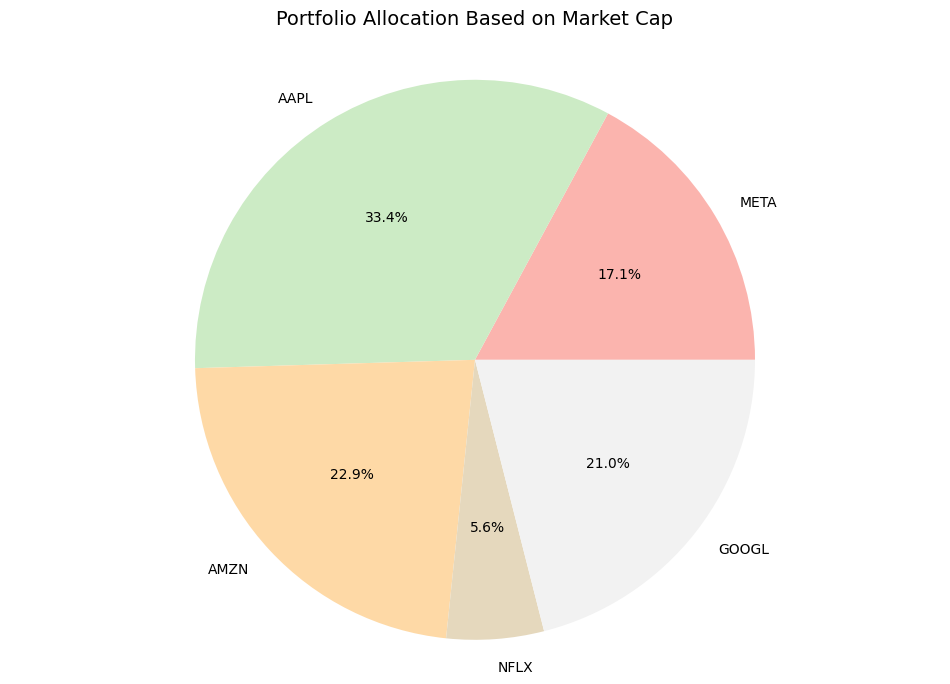

[*********************100%***********************]  1 of 1 completed


Market Cap Based Allocation:
META:
  Market Cap: $1,496,780,636,160.00
  Allocation: 17.12%
  Cash Allocation: $17,120.71
AAPL:
  Market Cap: $2,916,140,187,648.00
  Allocation: 33.36%
  Cash Allocation: $33,355.86
AMZN:
  Market Cap: $1,999,917,416,448.00
  Allocation: 22.88%
  Cash Allocation: $22,875.77
NFLX:
  Market Cap: $491,045,093,376.00
  Allocation: 5.62%
  Cash Allocation: $5,616.75
GOOGL:
  Market Cap: $1,838,630,305,792.00
  Allocation: 21.03%
  Cash Allocation: $21,030.91

Processing META...


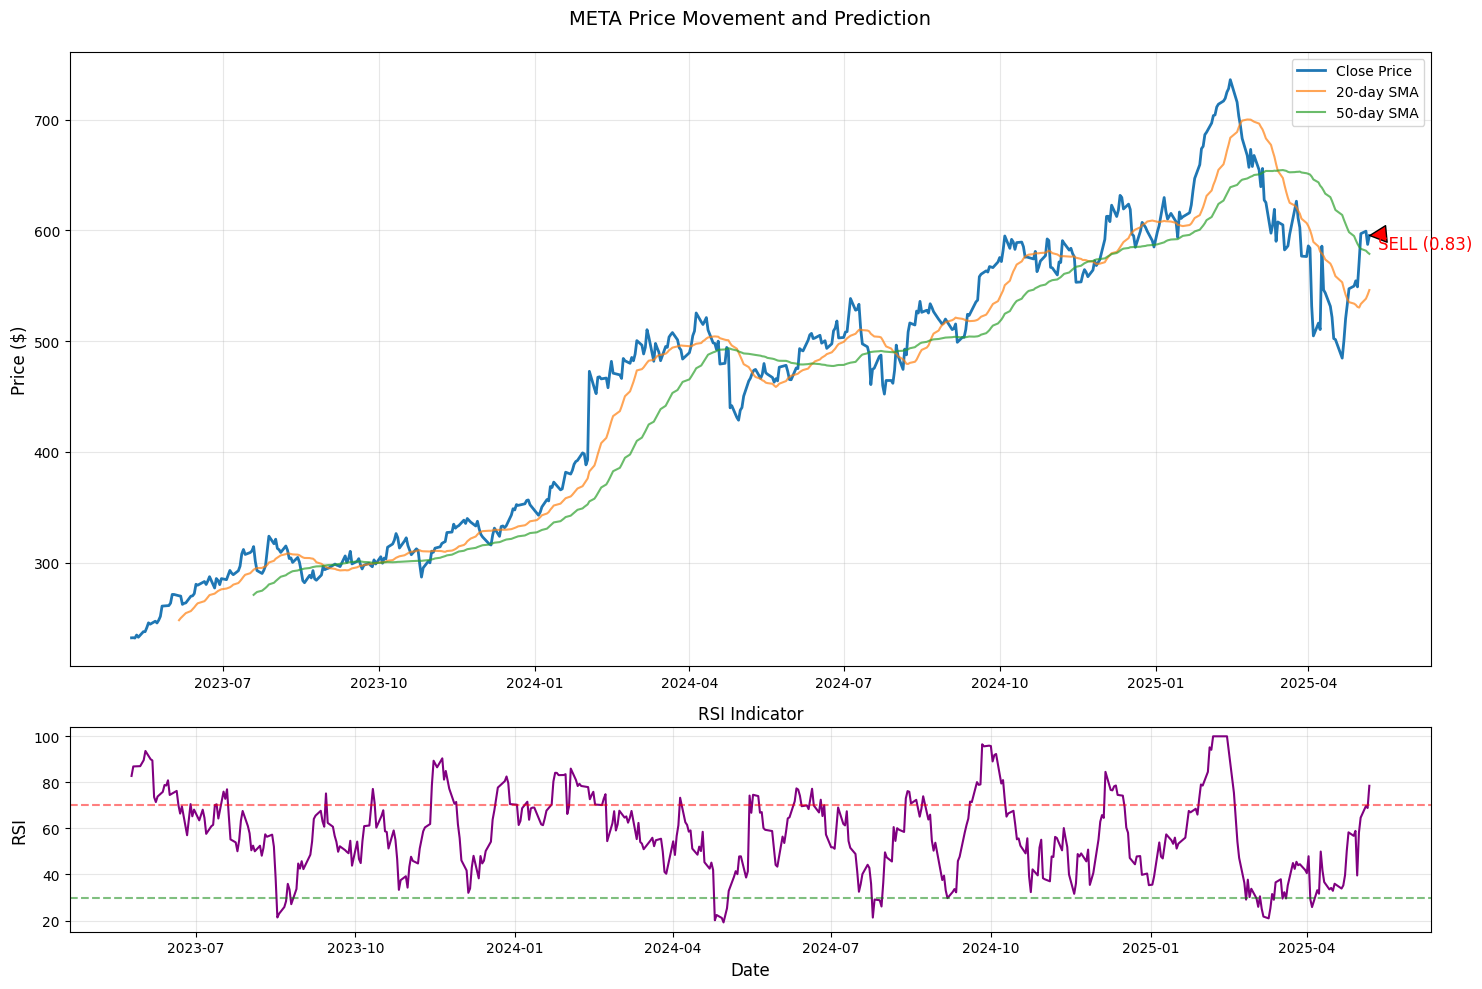


Processing AAPL...


[*********************100%***********************]  1 of 1 completed


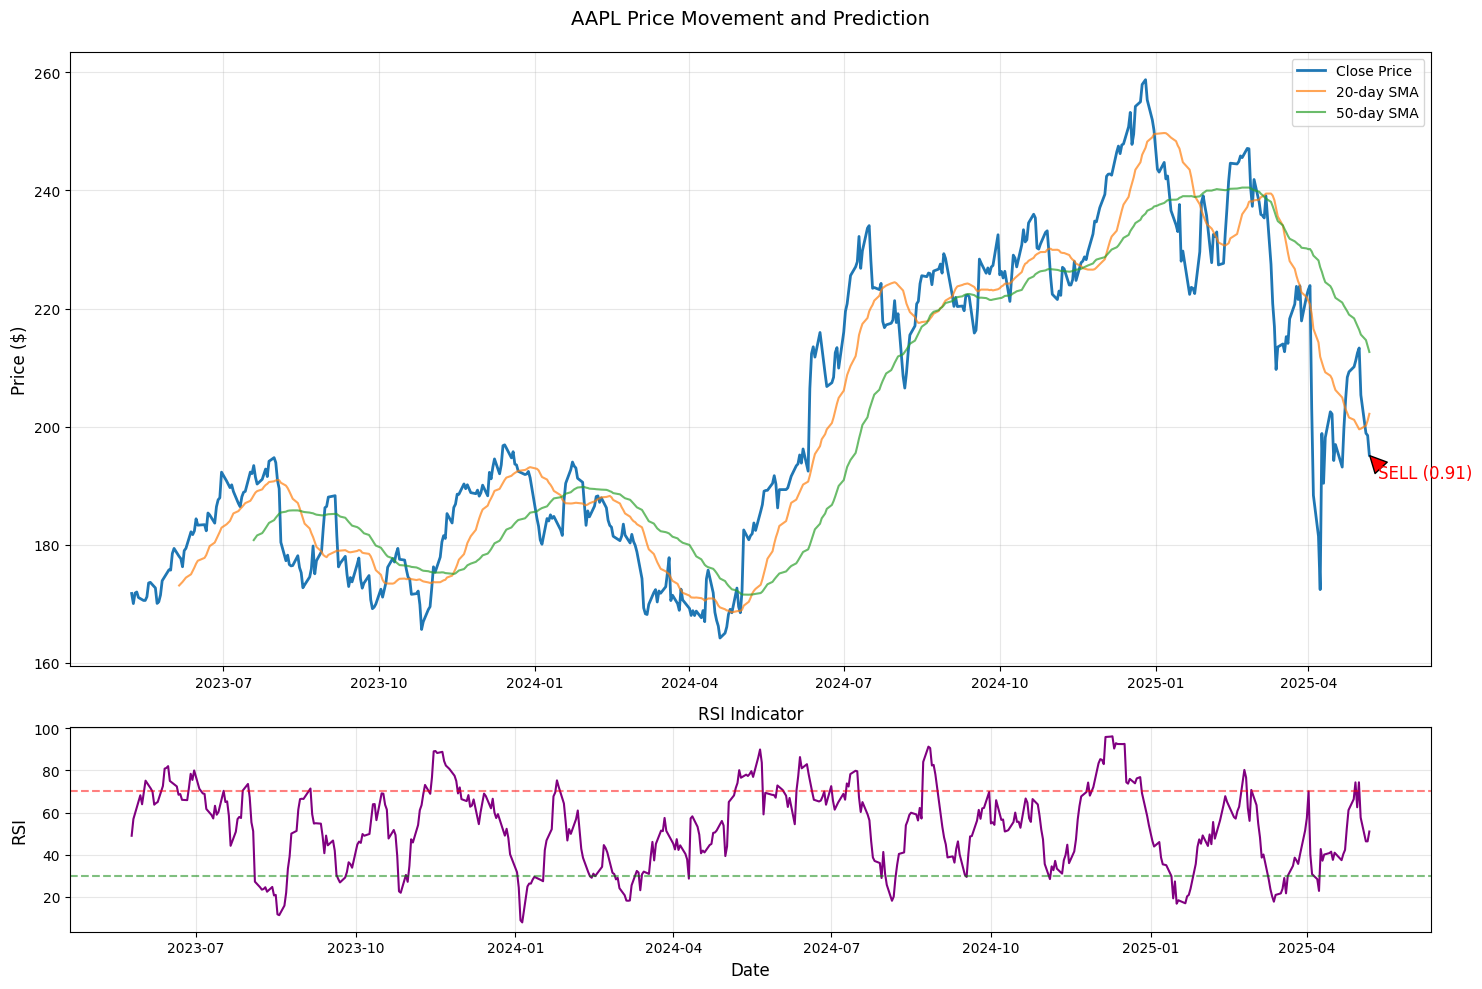

[*********************100%***********************]  1 of 1 completed


Processing AMZN...


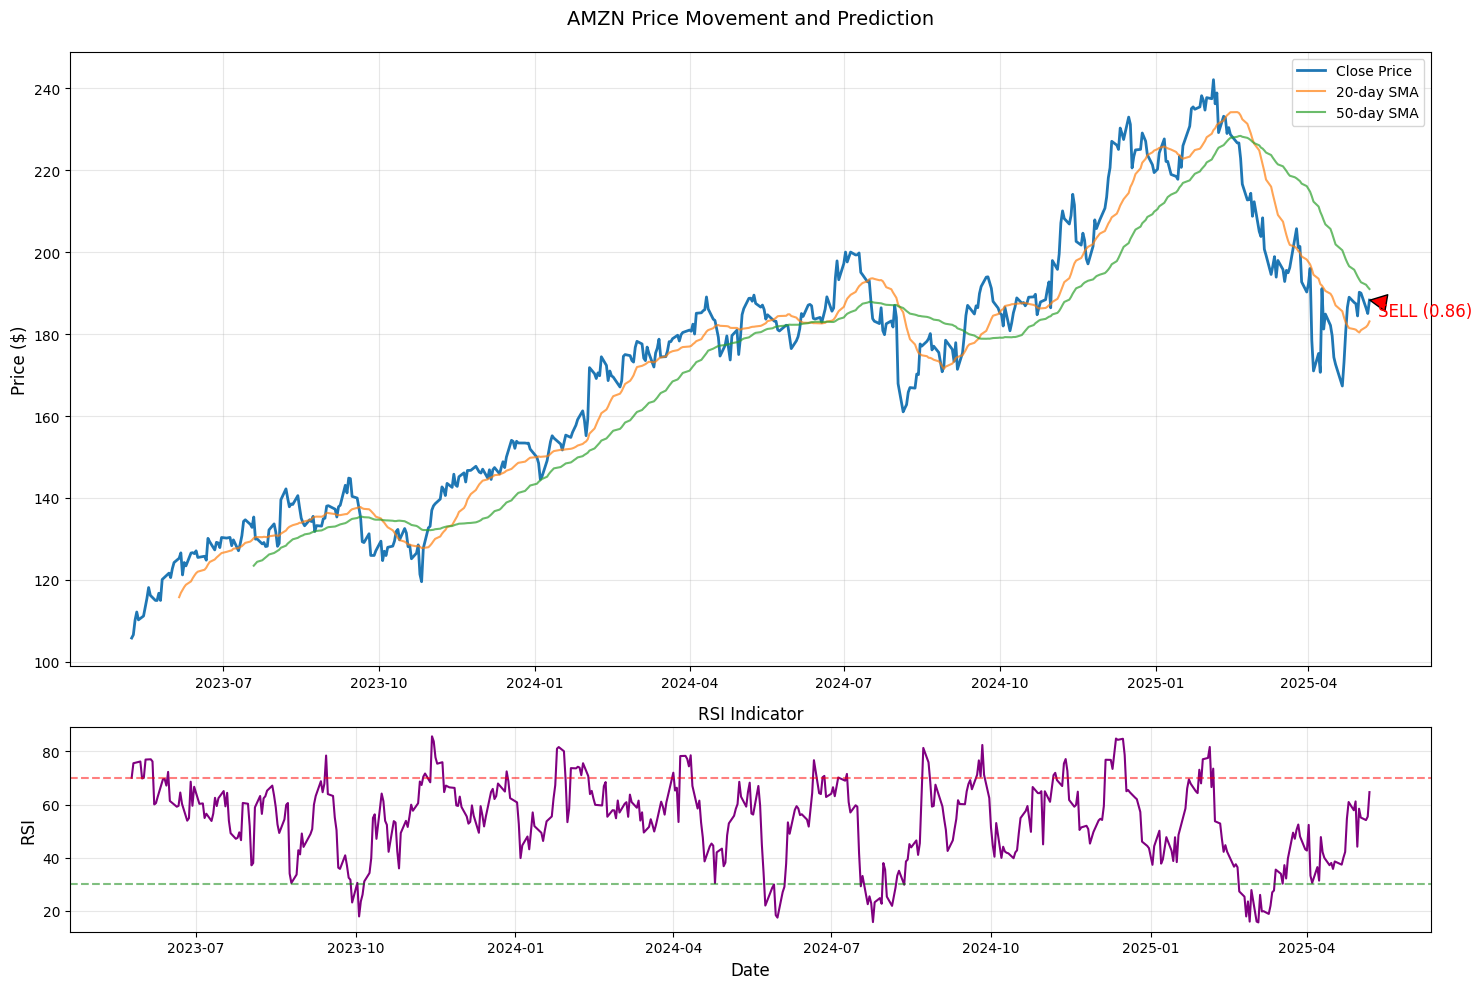

[*********************100%***********************]  1 of 1 completed


Processing NFLX...


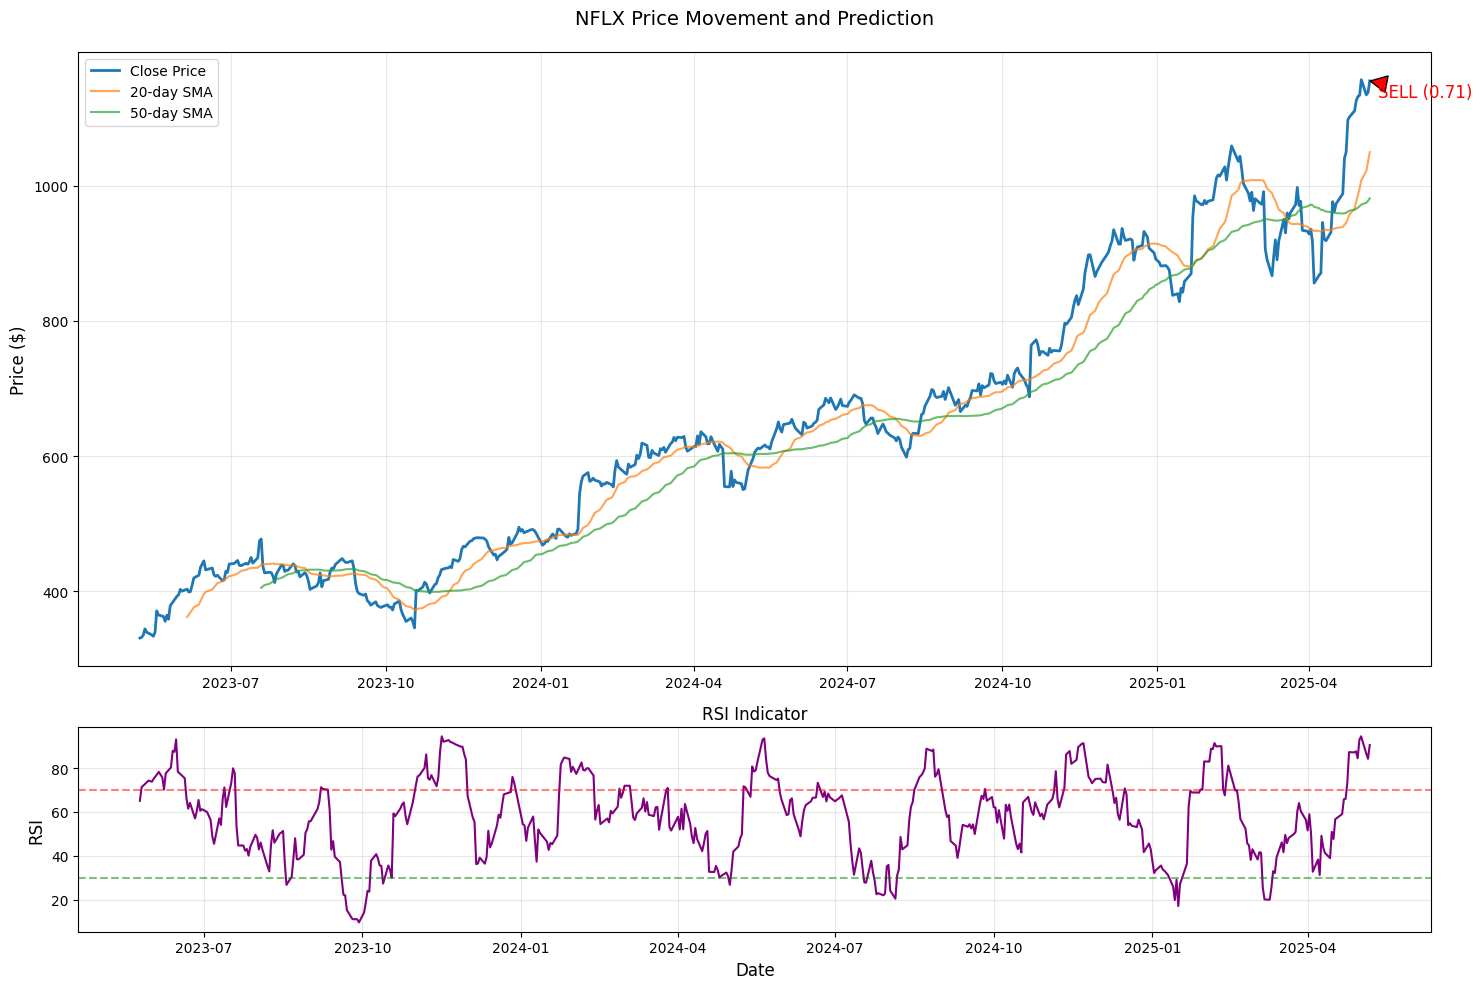

[*********************100%***********************]  1 of 1 completed


Processing GOOGL...


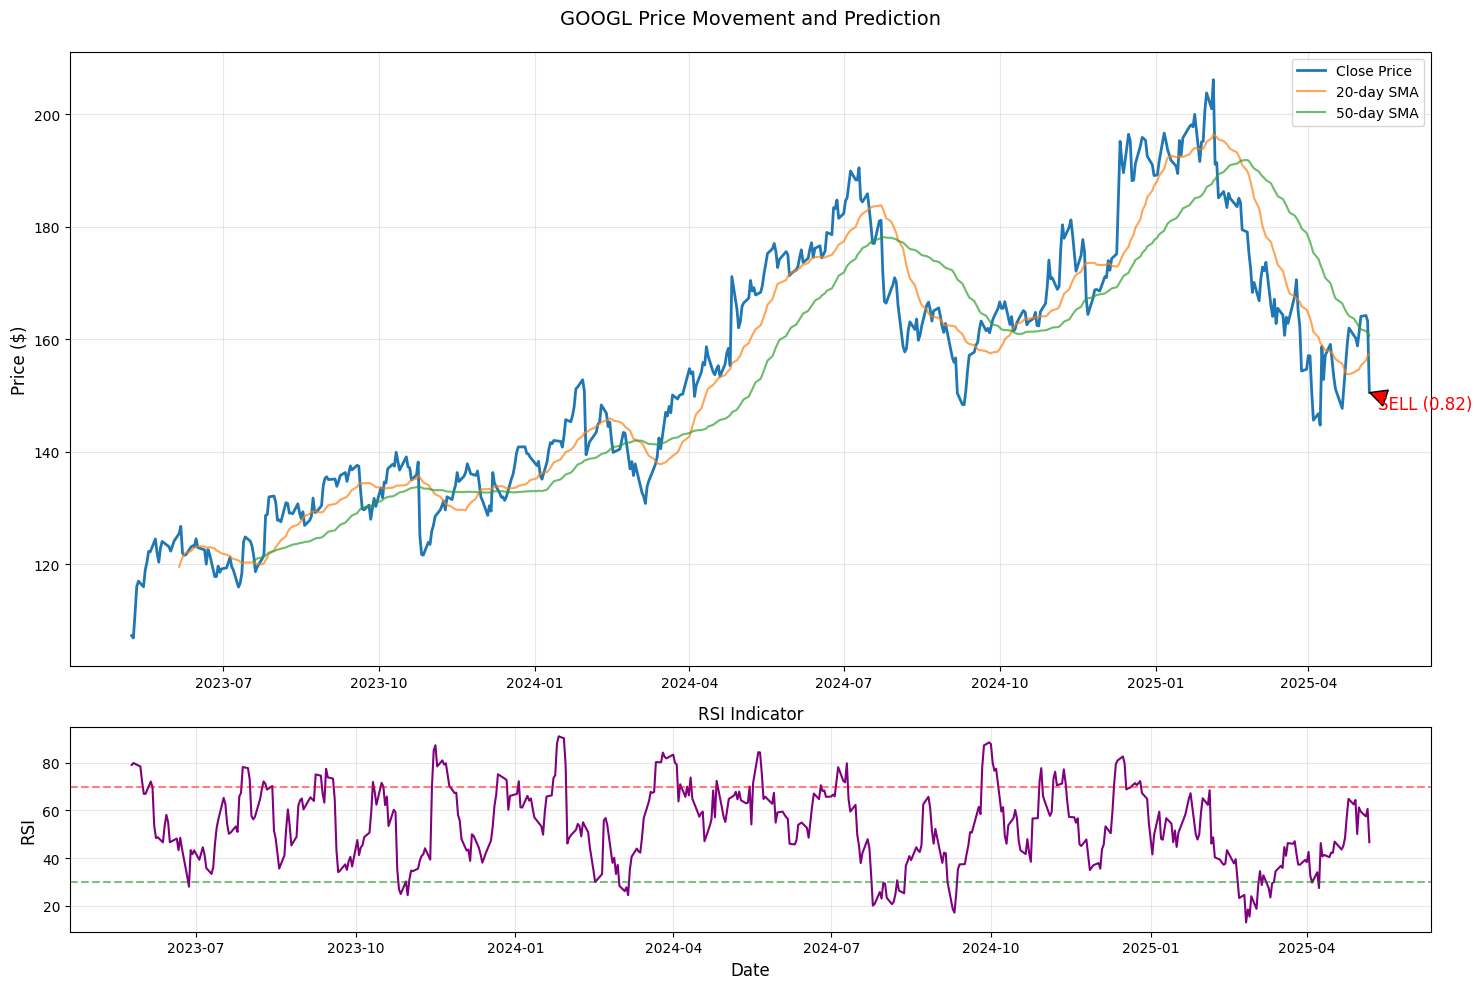

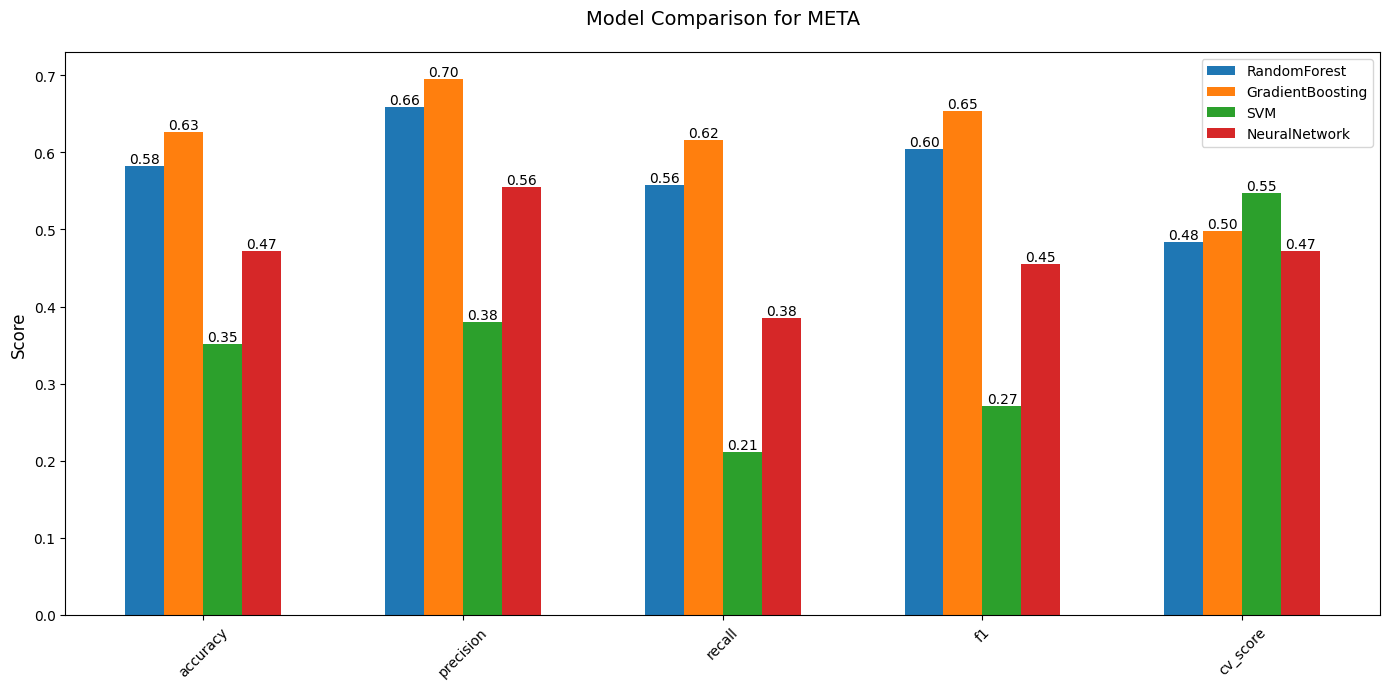

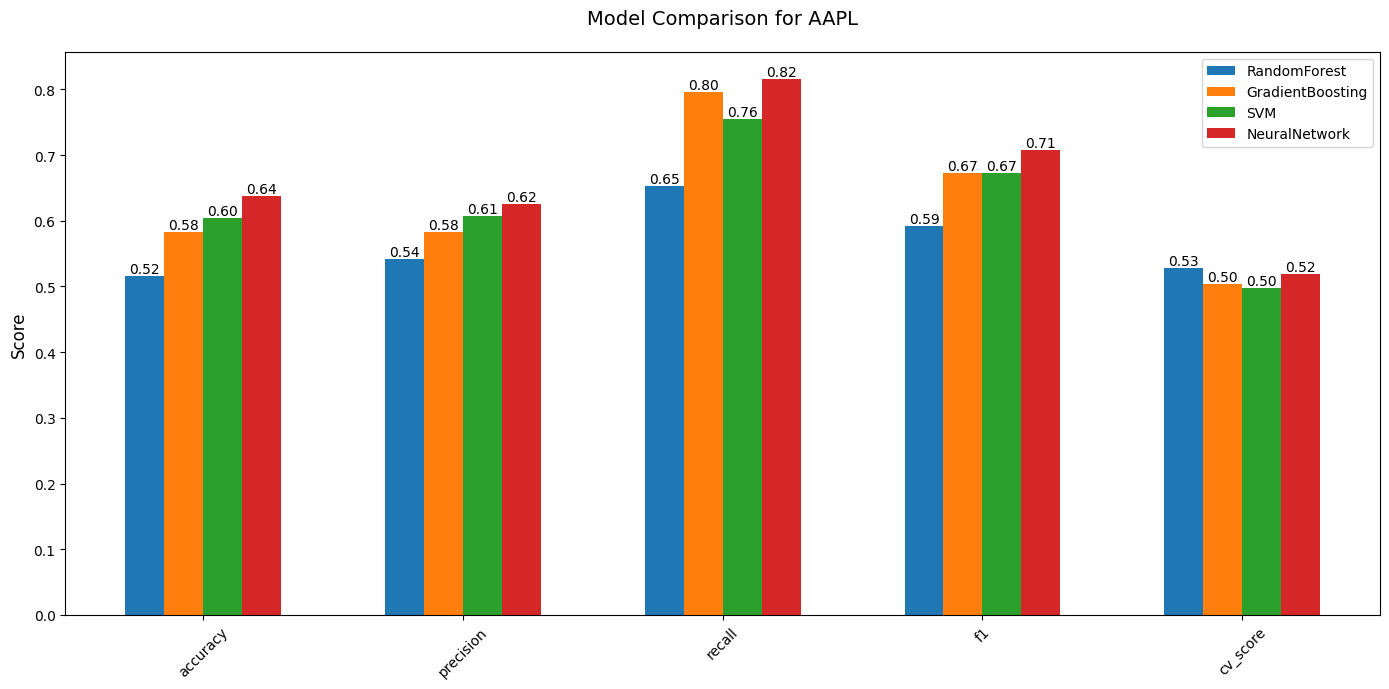

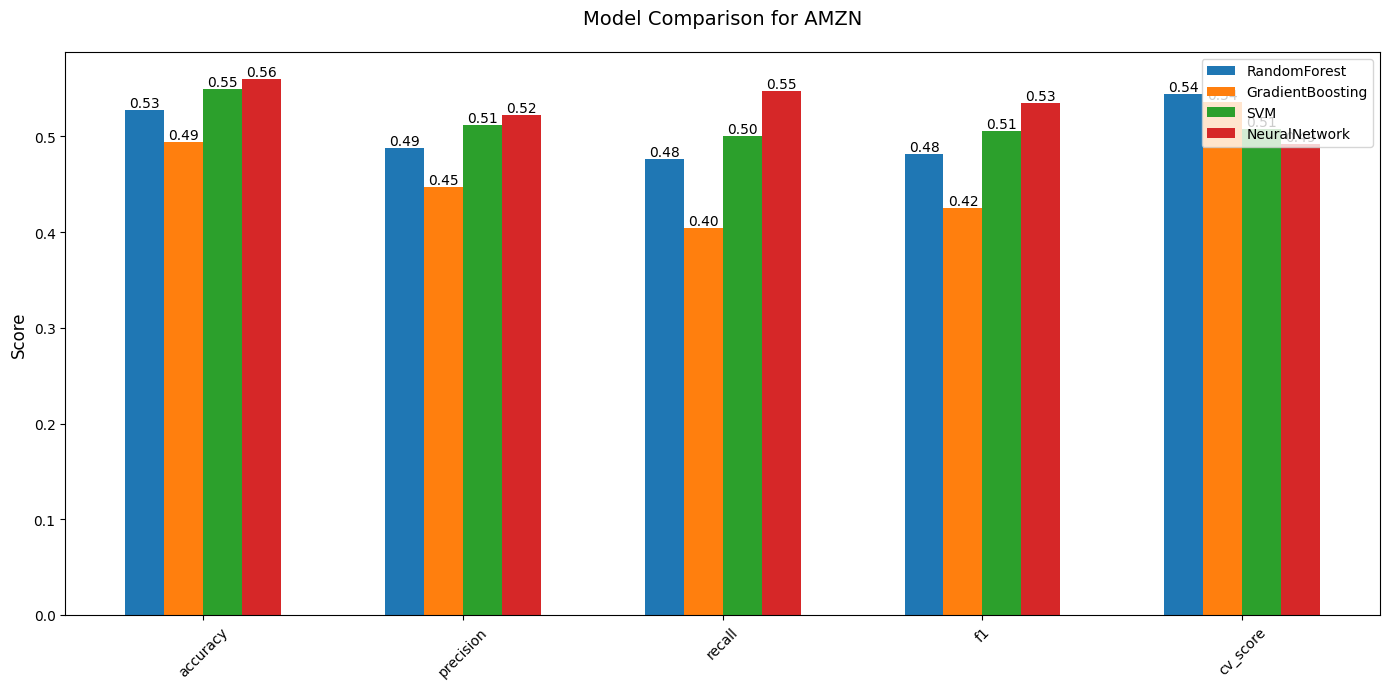

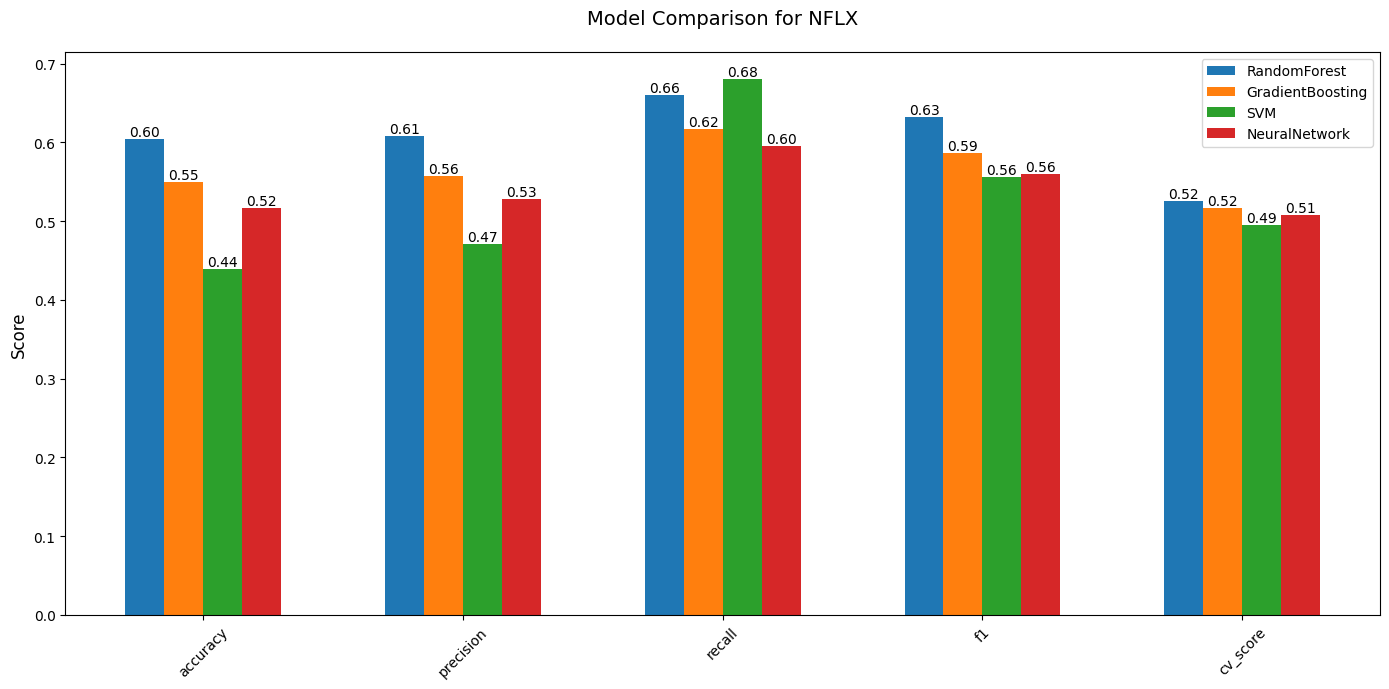

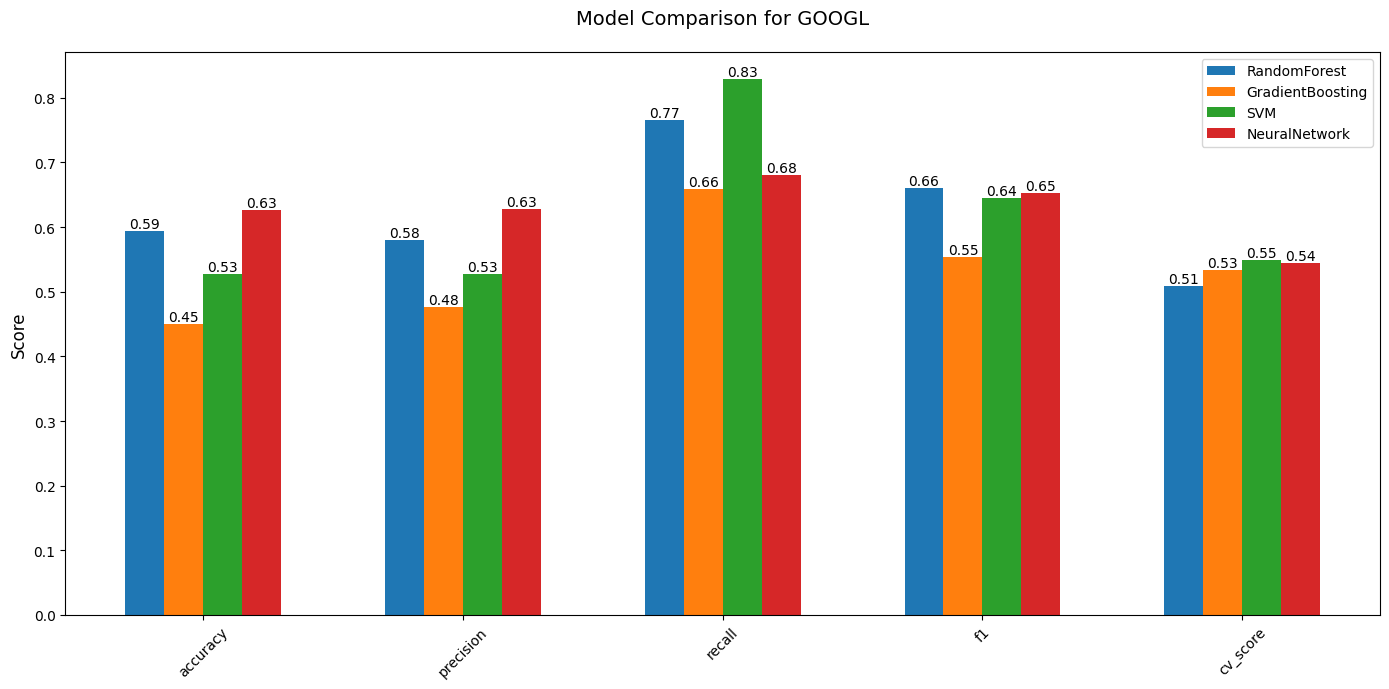

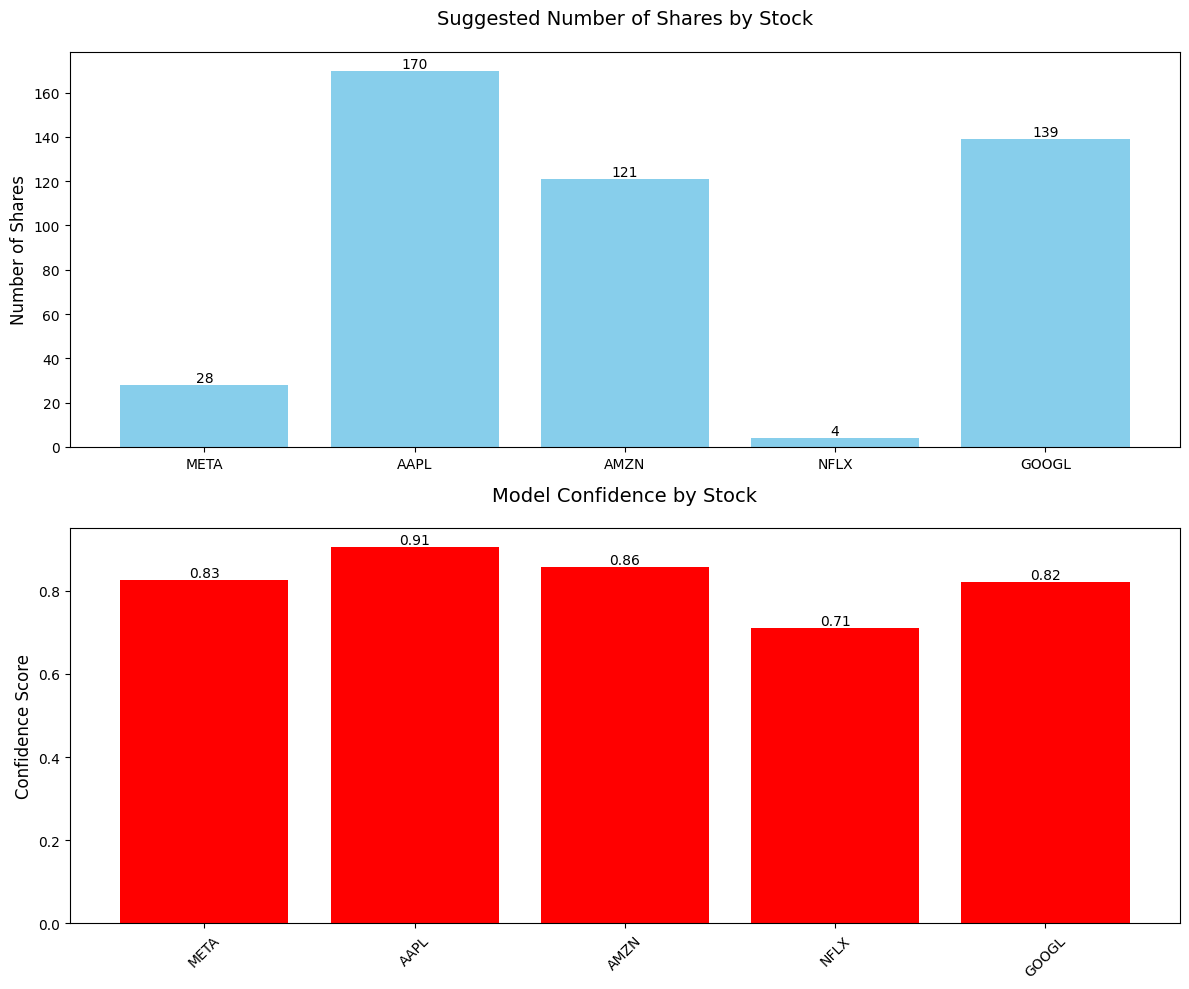


Final Portfolio Analysis:
      Market_Cap_Allocation_% Cash_Allocation        Best_Model Signal  \
META                17.120713    17120.712622  GradientBoosting   SELL   
AAPL                33.355855    33355.855168     NeuralNetwork   SELL   
AMZN                22.875771     22875.77119     NeuralNetwork   SELL   
NFLX                  5.61675     5616.749526      RandomForest   SELL   
GOOGL               21.030911    21030.911493      RandomForest   SELL   

      Confidence Current_Price Suggested_Shares  
META    0.826646    595.299988               28  
AAPL    0.905127    195.165802              170  
AMZN    0.858327    188.279999              121  
NFLX        0.71   1154.699951                4  
GOOGL       0.82    150.520004              139  

Detailed results saved to 'portfolio_analysis.csv'


In [59]:
main()